In [1]:
import pandas as pd
import sklearn 
import numpy as np
import astropy.table as table
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the cleaned data
#data is using only exoplanets with known masses and radii
exoplanets = table.Table.read('/home/cyrus/Downloads/confirmed_exoplanets.csv')

In [3]:
#displaying the imported table
exoplanets

pl_name,hostname,pl_rade,pl_bmasse
str29,str27,float64,float64
11 Com b,11 Com,12.1,6165.6
11 UMi b,11 UMi,12.3,4684.8142
14 And b,14 And,12.9,1525.5
14 Her b,14 Her,12.9,1481.0878
16 Cyg B b,16 Cyg B,13.5,565.7374
17 Sco b,17 Sco,12.9,1373.01872
...,...,...,...
tau Cet h,tau Cet,1.19,1.83
tau Gem b,tau Gem,12.1,6547.0


In [4]:
#identifying the column of the exoplanetary radii
planet_radius = exoplanets['pl_rade']

In [5]:
#identifying the column of the exoplanetary masses
planet_mass = exoplanets['pl_bmasse']

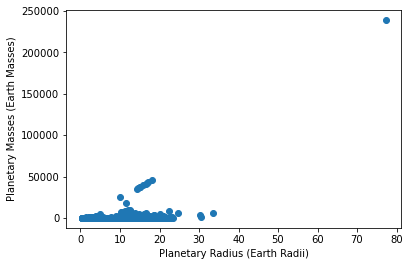

In [6]:
#plotting the data to see how it looks as is
plt.scatter(planet_radius, planet_mass)
plt.xlabel('Planetary Radius (Earth Radii)')
plt.ylabel('Planetary Masses (Earth Masses)')
plt.show()

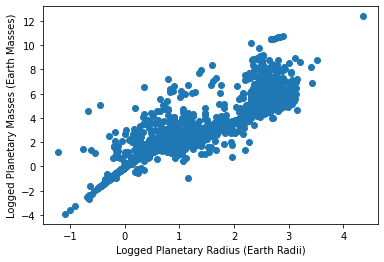

In [7]:
#Checking the logged planetary radii and masses to see if the data has better correlation
plt.scatter(np.log(planet_radius), np.log(planet_mass))
plt.xlabel('Logged Planetary Radius (Earth Radii)')
plt.ylabel('Logged Planetary Masses (Earth Masses)')
plt.show()

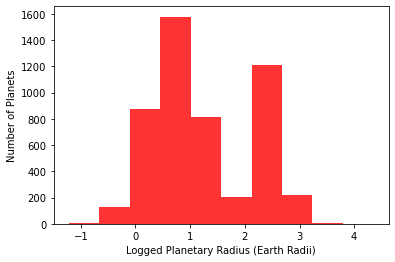

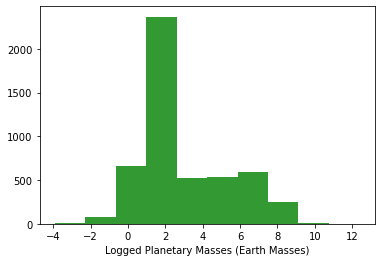

In [8]:
#Checking the distribution of the logged data
plt.hist(np.log(planet_radius), alpha = .8, color = 'red')
plt.xlabel('Logged Planetary Radius (Earth Radii)')
plt.ylabel('Number of Planets')
plt.show()
plt.hist(np.log(planet_mass), alpha = .8, color = 'green')
plt.xlabel('Logged Planetary Masses (Earth Masses)')
plt.show()

In [9]:
#now that the logged data is more gaussian, we can set up the linear regression model

In [10]:
#logging the data so it doesn't have to be manually logged every time
logged_radius = np.log(planet_radius)
logged_mass = np.log(planet_mass)

In [11]:
#reshaping the data
logged_radius = logged_radius.reshape(-1, 1)
logged_mass = logged_mass.reshape(-1, 1)

In [12]:
#importing the linear regression model
from sklearn.linear_model import LinearRegression

In [13]:
#setting up the function
lr = LinearRegression()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
radius_train, radius_test, mass_train, mass_test = train_test_split(logged_radius, logged_mass, train_size = .8, test_size = .2)

In [16]:
#fitting the data to the model
line_fit = lr.fit(radius_train, mass_train)

In [17]:
#creating the line of best fit
mass_predict = line_fit.predict(logged_radius)

<function matplotlib.pyplot.show(close=None, block=None)>

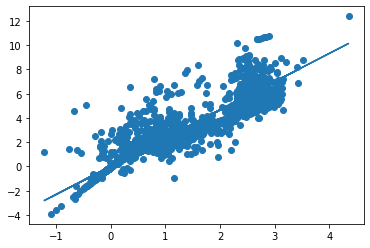

In [18]:
plt.scatter(logged_radius, logged_mass)
plt.plot(logged_radius, mass_predict)
plt.show

In [19]:
print(lr.intercept_)
print(lr.coef_)

[0.0172633]
[[2.32778676]]


In [20]:
#Scoring the accuracy of the model
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, logged_radius, logged_mass, cv=10, scoring="r2").mean())

0.7423819026954548


lr.score = R^2, where R^2 = (1 - u / v)
- u = ((y_true - y_predicted) ** 2).sum()
- v = ((y_true - y_true.mean()) ** 2).sum()

R^2 is the determination of how well datapoints fit a line, and has a range of 0 - 1, with 1 being the highest number possible. 

In [21]:
def mass_predict(radius):
    prediction = np.log(radius) * lr.coef_ + lr.intercept_
    return np.exp(prediction)
mass_predict(500)

array([[1950401.44542595]])

### Discussion

- Model limits include, but aren't limited to, a limited dataset (N slightly north of 5000), and uncertainties in the masses/radii
- Future work could incorporate the uncertainties, as well as expanding it so the model predicts a exoplanetary mass when a planetary radius is given
- log-log interpretation: log(y) = B0 + B1 * log(x) -> as x changes by 1%, y would change by B1%, except where x <= 0. The coefficients can't be calculated, or bias might be introduced
